#### This notebook consists of four tasks, which will be developed gradually :
1. Permutations and Combinations
2. numpy's Normal Distribution 
3. t-Test Calculation
4. ANOVA


### 1. Permutations and Combinations

This task is based on Lady Tasting Tea experiment created by Ronald Fisher published in The Design of Experiments in 1935.<br>Background: Eight cups of tea were given to a lady who was asked to differentiate between four cups of tea that had milk in first and four cups with tea added first. 

The null hypothesis H<sub>0</sub> of the experiment: The lady couldn't tell the difference between the cups.    

Task:       
- Altering the experiment by using 12 cups of tea instead of 8 with 6 having milk in first and 6 having tea in first where the subject claims to be able to tell the difference between the cups.<br> 
The H<sub>0</sub> remains the same: the subject is not able to distinguish between the cups.      
- Accept one error in the experiment assuming the subject selected 5 correct cups and calculate the probability with H<sub>0</sub> remaining the same     
- Accept two errors and calculate the probability         

In [44]:
# Importing modules
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

In [45]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

In [46]:
# https://docs.python.org/3/library/math.html#math.comb
# Combination represents the number of ways (k) to pick the cups with milk in first without repetition and order from the total number of cups (n)
ways = math.comb(no_cups, no_cups_milk_first)

# Show - there are 924 ways to pick the six cups with the milk in first
ways

924

In [47]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

In [48]:
# No of ways of shuffling the six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

In [49]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

In [50]:
# The cup labels
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [51]:
# Showing all the ways of selecting no_cups_milk_first out of no_cups cups of tea by using 
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [52]:
# Number of combinations.
len(combs)

924

In [53]:
# Select six cups at random to put milk in first
# https://docs.python.org/3/library/random.html#random.sample
# Different, randomized output each time 
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 3, 4, 7, 9, 11]

In [54]:
# Turn labels_milk into a set - gives unique values 
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 3, 4, 7, 9, 11}

In [55]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 3, 4} 3
(0, 1, 2, 3, 4, 6) {0, 3, 4} 3
(0, 1, 2, 3, 4, 7) {0, 3, 4, 7} 4
(0, 1, 2, 3, 4, 8) {0, 3, 4} 3
(0, 1, 2, 3, 4, 9) {0, 9, 3, 4} 4
(0, 1, 2, 3, 4, 10) {0, 3, 4} 3
(0, 1, 2, 3, 4, 11) {0, 11, 3, 4} 4
(0, 1, 2, 3, 5, 6) {0, 3} 2
(0, 1, 2, 3, 5, 7) {0, 3, 7} 3
(0, 1, 2, 3, 5, 8) {0, 3} 2
(0, 1, 2, 3, 5, 9) {0, 9, 3} 3
(0, 1, 2, 3, 5, 10) {0, 3} 2
(0, 1, 2, 3, 5, 11) {0, 11, 3} 3
(0, 1, 2, 3, 6, 7) {0, 3, 7} 3
(0, 1, 2, 3, 6, 8) {0, 3} 2
(0, 1, 2, 3, 6, 9) {0, 9, 3} 3
(0, 1, 2, 3, 6, 10) {0, 3} 2
(0, 1, 2, 3, 6, 11) {0, 11, 3} 3
(0, 1, 2, 3, 7, 8) {0, 3, 7} 3
(0, 1, 2, 3, 7, 9) {0, 9, 3, 7} 4
(0, 1, 2, 3, 7, 10) {0, 3, 7} 3
(0, 1, 2, 3, 7, 11) {0, 11, 3, 7} 4
(0, 1, 2, 3, 8, 9) {0, 9, 3} 3
(0, 1, 2, 3, 8, 10) {0, 3} 2
(0, 1, 2, 3, 8, 11) {0, 11, 3} 3
(0, 1, 2, 3, 9, 10) {0, 9, 3} 3
(0, 1, 2, 3, 9, 11) {0, 9, 3, 11} 4
(0, 1, 2, 3, 10, 11) {0, 11, 3} 3
(0, 1, 2, 4, 5, 6) {0, 4} 2
(0, 1, 2, 4, 5, 7) {0, 4, 7} 3
(0, 1, 2, 4, 5, 8) {0, 4} 2
(0, 1, 2, 4, 5, 9) {0, 9

In [56]:
# Show the overlaps.
print(no_overlaps)

[3, 3, 4, 3, 4, 3, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 2, 1, 2, 1, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 3, 2, 3, 2, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 4, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 4, 

In [57]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

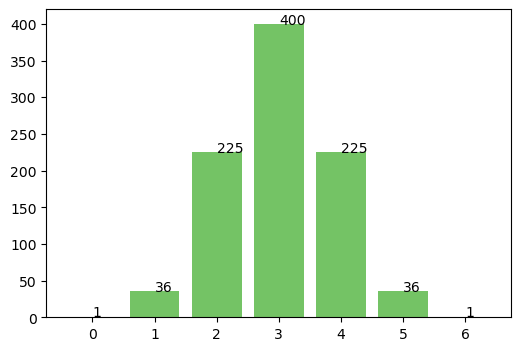

In [58]:
def addlabels(x,y):
    for i in range(len(x)):
        ax.text(i,y[i],y[i])

# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1], color='#74C365');
addlabels(counts[0], counts[1])

In [59]:
# The probability that she (randomly) selects at most five correct cups and 1 wrong
37/924

0.04004329004329004

In [60]:
# The probability that she (randomly) selects at most four correct cups (at most 2 wrong).
(225+36+1)/924

0.28354978354978355

The probability of the lady picking at most five correct and one wrong cup is very small, 4% and there is a high chance she will make another mistake if she chooses the cups again. The probability of the lady picking at most two wrong and four correct cups is higher, 28% which is why we would accept two errors. 

#### Sources: 
<https://github.com/ianmcloughlin/2425_applied_statistics>
